# Artificial Intelligence — Lab — Exercise 02

## Session 2: Uninformed & Informed Search Strategies — 8 - Puzzle Problem

### 26 August 2020

In a 3×3 board, 8 of the squares are filled with integers 1 to 9, and one square is left empty.
One move is sliding into the empty square the integer in any one of its adjacent squares. The
start state is given on the left side of the figure, and the goal state given on the right side. Find
a sequence of moves to go from the start state to the goal state.
1. Formulate the problem as a state space search problem.
2. Find a suitable representation for the states and the nodes.
3. Solve the problem using any of the uninformed search strategies.
4. We can use Manhattan distance as a heuristic h(n). The cheapest cost from the current
node to the goal node, can be estimated as how many moves will be required to transform the current node into the goal node. This is related to the distance each tile must
travel to arrive at its destination, hence we sum the Manhattan distance of each square
from its home position.
5. An alternative heuristic should consider the number of tiles that are “out-of-sequence”.
An out of sequence score can be computed as follows:<br>
• a tile in the center counts 1,<br>
• a tile not in the center counts 0 if it is followed by its proper successor as defined
by the goal arrangement,<br>
• otherwise, a tile counts 2.<br>
6. Use anyone of the two heuristics, and implement Greedy Best-First Search.
7. Use anyone of the two heuristics, and implement A* Search.

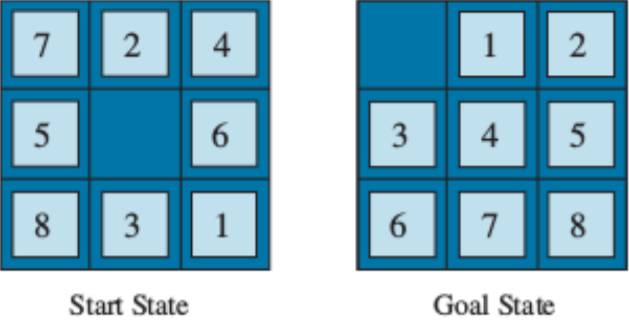

In [1]:
from collections import deque
import heapq

In [2]:
class Puzzle_State:
    """Container class to hold the current state of the Puzzle."""

    parent = None
    state = None
    operation = None
    zero = None
    depth = 0
    cost = 0
    backward_cost = False

    def __init__(self, state, parent = None, operation = None, depth = 0, backward_cost = False):
        """Default constructor."""

        self.parent = parent
        self.state = state
        self.operation = operation
        self.zero = self.find_zero()
        self.depth = depth
        self.backward_cost = backward_cost

        if backward_cost == True:       #for A* Search Algorithm, the backward-path cost is required
            self.cost = self.depth + self.manhattan_distance()
        else:                           #for Greedy BFS Algorithm, the backward-path cost is not required.
            self.cost = self.manhattan_distance()


    def __str__(self):
        """String notation of the Puzzle_State object."""

        return  str(self.state[:3]) + "\n" \
            +   str(self.state[3:6]) + "\n" \
            +   str(self.state[6:]) + "\n"

    def __lt__(self, another_board):
        """To override the < operator for the class with the cost function f(n) of the puzzle configuration."""

        return self.cost < another_board.cost

    
    def is_goal_state(self):
        """Checks if the goal state has been reached."""

        for i in range(0, len(self.state)):
            if i == self.state[i]:
                continue
            else:
                return False
        return True

    def find_zero(self):
        """Finds the index of 0 from the given state configuration."""

        for i in range(9):
            if self.state[i] == 0:
                return i
    
    def swap(self, i, j):
        """Swaps the ith element and jth element of the state configuration."""

        new_state = list(self.state)
        new_state[i], new_state[j] = new_state[j], new_state[i]
        return new_state

    def move_up(self):
        """Moves a block up, if there is a zero in the appropriate position. Returns None if configuration is not possible."""

        if self.zero > 2:
            return Puzzle_State(self.swap(self.zero, self.zero - 3), self, 'Up', self.depth + 1, self.backward_cost)
        else:
            return None
    
    def move_down(self):
        """Moves a block down, if there is a zero in the appropriate position. Returns None if configuration is not possible."""

        if self.zero < 6:
            return Puzzle_State(self.swap(self.zero, self.zero + 3), self, 'Down', self.depth + 1, self.backward_cost)
        else:
            return None
    
    def move_left(self):
        """Moves a block left, if there is a zero in the appropriate position. Returns None if configuration is not possible."""

        if self.zero % 3 != 0:
            return Puzzle_State(self.swap(self.zero, self.zero - 1), self, 'Left', self.depth + 1, self.backward_cost)
        else:
            return None
    
    def move_right(self):
        """Moves a block right, if there is a zero in the appropriate position. Returns None if configuration is not possible."""

        if (self.zero + 1) % 3 != 0:
            return Puzzle_State(self.swap(self.zero, self.zero + 1), self, 'Right', self.depth + 1, self.backward_cost)
        else:
            return None

    def find_next_states(self):
        """Finds the possible next state configurations based on the 4 available moves."""

        next_states = []
        next_states.append(self.move_up())
        next_states.append(self.move_down())
        next_states.append(self.move_left())
        next_states.append(self.move_right())

        next_states = list(filter(None, next_states))

        return next_states

    def manhattan_distance(self):
        """Calculates the Heuristic Function h(n) based on the Manhattan Distance between a 
        block and it's final state position."""

        heuristic = 0

        for i in range(len(self.state)):
            if self.state[i] == 0:      #do not include the blank tile as part of the Manhattan distance.
                continue
                        #absolute vertical distance + absolute horizontal distance from it's goal position
            heuristic += abs(self.state[i] // 3 - i // 3) + abs(self.state[i] % 3 - i % 3)

        return heuristic

    # def blocks_out_of_sequence(self):
    #     """Calculates the Heuristic Function h(n) based on the number of blocks that are out of sequence from it's final state position."""

    #     heuristic = 0

    #     for i in range(len(self.state)):
    #         if self.state[i] != 0 and i == 4:                                   # a tile in the center counts 1
    #             heuristic += 1
    #         elif i != 4 and i-1 > 0 and self.state[i] == self.state[i-1] + 1:   #a tile not in the center counts 0 if it is followed 
    #             heuristic += 0                                                  # by its proper successor as defined by the goal arrangement
    #         else:                                                               # otherwise, a tile counts 2
    #             heuristic += 1
        
    #     return heuristic

In [3]:
class Puzzle_Solver:
    """Container class that implements the functions to solve the 8-Puzzle board and trace the path."""

    solution = None
    nodes_found = 0
    current_depth = 0


    def BFS(self, init_state):
        """Performs an uninformed BFS algorithm on the given initial Puzzle configuration."""

        frontier = deque()
        explored = set()

        frontier.append(init_state)
        explored.add(tuple(init_state.state))

        while frontier:
            board = frontier.popleft()
            #explored.add(tuple(board.state))

            if board.is_goal_state():
                self.solution = board
                self.nodes_found = len(explored) - len(frontier) - 1
                return self.solution
            
            for next_state in board.find_next_states():
                if tuple(next_state.state) not in explored:
                    frontier.append(next_state)
                    explored.add(tuple(next_state.state))
                    self.current_depth = max(self.current_depth, next_state.depth)
            
        return None

    def a_star(self, init_state):
        """Performs an informed A* Search Algorithm on the given initial Puzzle configuration."""

        frontier = []
        explored = set()

        heapq.heappush(frontier, init_state)
        explored.add(tuple(init_state.state))

        while frontier:
            board = heapq.heappop(frontier)
            #explored.add(tuple(board.state))

            if board.is_goal_state():
                self.solution = board
                self.nodes_found = len(explored) - len(frontier) - 1
                return self.solution
            
            for next_state in board.find_next_states():
                if tuple(next_state.state) not in explored:
                    heapq.heappush(frontier, next_state)
                    explored.add(tuple(next_state.state))
                    self.current_depth = max(self.current_depth, next_state.depth)
            
        return None

    def greedy_BFS(self, init_state):
        """Performs a Greedy Best-First Search Algorithm on the given initial Puzzle configuration."""

        frontier = []
        explored = set()

        heapq.heappush(frontier, init_state)
        explored.add(tuple(init_state.state))

        while frontier:
            board = heapq.heappop(frontier)
            #explored.add(tuple(board.state))

            if board.is_goal_state():
                self.solution = board
                self.nodes_found = len(explored) - len(frontier) - 1
                return self.solution

            for next_state in board.find_next_states():
                if tuple(next_state.state) not in explored:
                    heapq.heappush(frontier, next_state)
                    explored.add(tuple(next_state.state))
                    self.current_depth = max(self.current_depth, next_state.depth)
        
        return None

    def trace_path(self):
        """Traces the path taken by any search algorithm using the parent data member of the Puzzle object."""

        this_state = self.solution
        path = [this_state]

        while this_state.parent != None:
            path.append(this_state.parent)
            this_state = this_state.parent
        
        return path[::-1]

    def print_report(self, algorithm):
        """Function to print the no. of explored states, depth of the path & 
        the path traced by the algorithm to get the goal state."""

        print("---------------------------------------------------------------------------------------------------------------")
        print("\nNo. of States Visited\t:", self.nodes_found)
        print("\nDepth of {0}\t: {1}".format(algorithm, self.current_depth))
        print("\nSolution Path:\n")
    
        for state in self.trace_path():
            print("Move :", state.operation)
            print(state, "\n")
        
        print("---------------------------------------------------------------------------------------------------------------")

In [4]:
if __name__ == "__main__":
    """Driver class to implement the 8-Puzzle Solver using different search algorithms."""
    
    
    
    print("\n\t\t\tUninformed Search : Breadth-First Search\n")
    solver = Puzzle_Solver()
    init_state = Puzzle_State([7, 2, 4, 5, 0, 6, 8, 3, 1])
    solution = solver.BFS(init_state)
    solver.print_report("BF Search")

    print("\n\t\t\tInformed Search : A* Search\n")
    solver = Puzzle_Solver()
    init_state = Puzzle_State([7, 2, 4, 5, 0, 6, 8, 3, 1], backward_cost=True)
    solution = solver.a_star(init_state)
    solver.print_report("A* Search")
    
    print("\n\t\t\tInformed Search : Greedy Best-First Search\n")
    solver = Puzzle_Solver()
    init_state = Puzzle_State([7, 2, 4, 5, 0, 6, 8, 3, 1])
    solution = solver.greedy_BFS(init_state)
    solver.print_report("Greedy BFS")


			Uninformed Search : Breadth-First Search

---------------------------------------------------------------------------------------------------------------

No. of States Visited	: 171711

Depth of BF Search	: 27

Solution Path:

Move : None
[7, 2, 4]
[5, 0, 6]
[8, 3, 1]
 

Move : Left
[7, 2, 4]
[0, 5, 6]
[8, 3, 1]
 

Move : Up
[0, 2, 4]
[7, 5, 6]
[8, 3, 1]
 

Move : Right
[2, 0, 4]
[7, 5, 6]
[8, 3, 1]
 

Move : Down
[2, 5, 4]
[7, 0, 6]
[8, 3, 1]
 

Move : Down
[2, 5, 4]
[7, 3, 6]
[8, 0, 1]
 

Move : Left
[2, 5, 4]
[7, 3, 6]
[0, 8, 1]
 

Move : Up
[2, 5, 4]
[0, 3, 6]
[7, 8, 1]
 

Move : Right
[2, 5, 4]
[3, 0, 6]
[7, 8, 1]
 

Move : Right
[2, 5, 4]
[3, 6, 0]
[7, 8, 1]
 

Move : Up
[2, 5, 0]
[3, 6, 4]
[7, 8, 1]
 

Move : Left
[2, 0, 5]
[3, 6, 4]
[7, 8, 1]
 

Move : Left
[0, 2, 5]
[3, 6, 4]
[7, 8, 1]
 

Move : Down
[3, 2, 5]
[0, 6, 4]
[7, 8, 1]
 

Move : Right
[3, 2, 5]
[6, 0, 4]
[7, 8, 1]
 

Move : Right
[3, 2, 5]
[6, 4, 0]
[7, 8, 1]
 

Move : Down
[3, 2, 5]
[6, 4, 1]
[7, 8, 0]
 

Move